# Prediction Using Supervised Machine Learning

# Predict the Percentage of an student based on the no. of study hours.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Importing dataset
scores = pd.read_excel("Book1.xlsx")

In [3]:
# Printing the first 5 rows
scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Description of the dataset
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
scores.shape

(25, 2)

In [6]:
scores.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [7]:
scores.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [8]:
# Descriptive Analysis
scores.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Plotting Scores vs Hours

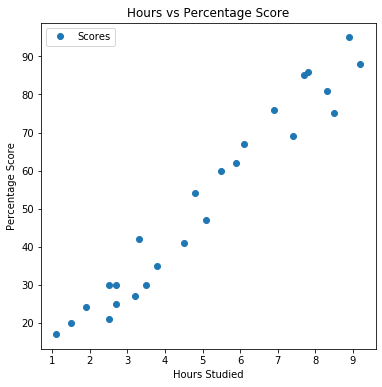

In [9]:
# Plotting the distribution of scores
scores.plot(x='Hours', y='Scores', style='o',figsize=(6,6))  
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Correlation between features

In [10]:
scores.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Splitting the dataset into training set and testing set

In [11]:
X = scores.iloc[:, :-1].values #Hours  
y = scores.iloc[:, 1].values #Scores

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0) 

In [13]:
len(X_train),len(y_train)

(20, 20)

In [14]:
len(X_test),len(y_test)

(5, 5)

Training the Algorithm

In [18]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(X_train, y_train) 

print("Training complete.")

Training complete.


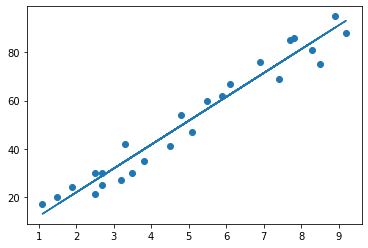

In [19]:
# Plotting the regression line
line = lr.coef_*X+lr.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

Making Predictions

In [20]:
print(X_test) # Testing data - In Hours

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [21]:
y_pred = lr.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

Calculating the regression Values

In [22]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual values': y_test, 'Predicted values': y_pred})  
df 

,Actual values,Predicted values
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [23]:
hrs = 9.25
pred_value = lr.predict([[hrs]])
pred_value

array([93.69173249])

In [24]:
print("No of Hours = {}".format(hrs))
print("Predicted Score = {}".format(pred_value[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


Evaluation of the model

In [25]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [26]:
print('Mean Absolute Error is :',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error is : 4.183859899002982


In [27]:
print('Mean Squared Error is :',metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error is : 21.598769307217456


In [28]:
print('R2 Squared Error is :',metrics.r2_score(y_test, y_pred))

R2 Squared Error is : 0.9454906892105354


# Thank You